In [1]:
import cv2

img = cv2.imread('lena.jpg', -1)

print(img)

[[[128 138 225]
  [127 137 224]
  [126 136 223]
  ...
  [126 146 234]
  [110 129 220]
  [ 86 104 197]]

 [[127 138 222]
  [127 137 224]
  [127 137 224]
  ...
  [130 150 235]
  [112 131 218]
  [ 83 102 189]]

 [[127 138 222]
  [127 137 224]
  [128 138 225]
  ...
  [127 148 230]
  [112 133 215]
  [ 85 105 190]]

 ...

 [[ 55  21  82]
  [ 54  20  81]
  [ 62  28  92]
  ...
  [ 82  71 175]
  [ 78  68 175]
  [ 74  65 175]]

 [[ 55  18  80]
  [ 54  20  81]
  [ 67  33  94]
  ...
  [ 82  69 177]
  [ 82  70 182]
  [ 81  72 183]]

 [[ 56  19  81]
  [ 58  21  83]
  [ 69  35  96]
  ...
  [ 81  68 178]
  [ 83  71 183]
  [ 84  74 188]]]


In [3]:
cv2.imshow('image',img)
k= cv2.waitKey(0)

if k == 27:
    cv2.destroyAllWindows()
elif k == ord('s'):
    cv2.imwrite('lena_copy.png', img)
    cv2.destroyAllWindows()

# Setting camera parameters



In [2]:
import cv2
cap = cv2.VideoCapture(1)

print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

cap.set(3, 3000)
cap.set(4, 3000)

print(cap.get(3))
print(cap.get(4))
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame', gray)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
cv2.destroyAllWindows()

0.0
0.0
0.0
0.0


In [3]:
import numpy as np
import cv2

img = cv2.imread('messi5.jpg')
img2 = cv2.imread('opencv-logo.png')

print(img.shape)# returns tuple of number of rows,columns and channels
print(img.size) #returns no of pixels
print(img.dtype) # datatype

b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))

ball= img[280:340, 330:390]
img[273:333, 100:160]= ball

img = cv2.resize(img,(512,512))
img2 = cv2.resize(img2,(512,512))

#hi= cv2.add(img, img2)

hi= cv2.addWeighted(img, .4, img2, .6, 0);

cv2.imshow('image',hi) 
cv2.waitKey(0)
cv2.destroyAllWindows()


(342, 548, 3)
562248
uint8


# Bitwise operations

In [16]:

img1 = np.zeros((250, 500, 3), np.uint8)
img1 = cv2.rectangle(img1,(200, 0), (300, 100), (255, 255, 255), -1)
img2 = cv2.imread("image1.jpg")


bitAnd= cv2.bitwise_and(img2, img1)
bitOr = cv2.bitwise_or(img2, img1)
bitXor = cv2.bitwise_xor(img1, img2)
bitNot1 = cv2.bitwise_not(img1)
bitNot2 = cv2.bitwise_not(img2)

cv2.imshow("img1", img1)
cv2.imshow("img2", img2)

cv2.imshow('bitAnd', bitAnd)
cv2.imshow('bitOr', bitOr)
cv2.imshow('bitXor', bitXor)
cv2.imshow('bitNot1', bitNot1)
cv2.imshow('bitNot2', bitNot2)


cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\core\src\arithm.cpp:229: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and type), nor 'array op scalar', nor 'scalar op array' in function 'cv::binary_op'


# Image thresholding

In [30]:
import cv2 as cv

img= cv.imread('gradient.png',0)
_, th1= cv.threshold(img, 127, 255,cv.THRESH_BINARY )
_, th2= cv.threshold(img, 127, 255,cv.THRESH_BINARY_INV )
_, th3= cv.threshold(img, 127, 255,cv.THRESH_TRUNC )
_, th4= cv.threshold(img, 127, 255,cv.THRESH_TOZERO) 
_, th5= cv.threshold(img, 127, 255,cv.THRESH_TOZERO_INV)

cv.imshow("Image",img)
cv.imshow("th1",th1)
cv.imshow("th2",th2)
cv.imshow("th3",th3)
cv.imshow("th4",th4)
cv.imshow("th5",th5)

cv.waitKey(0)
cv.destroyAllWindows()


In [4]:
# adaptive thresholding:  threshold value is calculated for smaller region

import cv2 as cv

img = cv.imread('sudoku.png',0)
_, th1= cv.threshold(img, 127, 255,cv.THRESH_BINARY )

th2= cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2 );
th3= cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2 );


cv.imshow("Image",img)
cv.imshow("th1", th1)
cv.imshow("th2", th2)
cv.imshow("th3", th3)

cv.waitKey(0)
cv.destroyAllWindows()


# Understanding Image Histograms

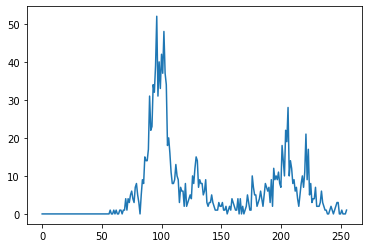

In [13]:
import numpy as np

import cv2 as cv
from matplotlib import pyplot as plt

img= cv.imread("lena.jpg")
#img= np.zeros((200,200),np.uint8)
#cv.rectangle(img, (0, 100),(200, 200), (255), -1)
#cv.rectangle(img, (0, 50),(100, 100), (127), -1)

#b,g,r = cv.split(img)

hist= cv.calcHist((img),[0], None, [256], [0, 256])
plt.plot(hist)

#cv.imshow("img", img)
#cv.imshow("blue", b)
#cv.imshow("green", g)
#cv.imshow("red", r)

#plt.hist(img.ravel(), 256, [0, 256])
#plt.hist(b.ravel(), 256, [0, 256])
#plt.hist(g.ravel(), 256, [0, 256])
#plt.hist(r.ravel(), 256, [0, 256])
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()

# Object detection using HSV Color

In [23]:
# Hue, Saturation , Value: HSV

import cv2

def nothing(x):
    pass

cap = cv2.VideoCapture(0);

cv2.namedWindow("Tracking")
cv2.createTrackbar("LH","Tracking", 0, 255, nothing)
cv2.createTrackbar("LS","Tracking", 0, 255, nothing)
cv2.createTrackbar("LV","Tracking", 0, 255, nothing)
cv2.createTrackbar("UH","Tracking", 255, 255, nothing)
cv2.createTrackbar("US","Tracking", 255, 255, nothing)
cv2.createTrackbar("UV","Tracking", 255, 255, nothing)

while True:
    #frame= cv2.imread('smarties.png')
    _, frame= cap.read()
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    l_h =cv2.getTrackbarPos("LH", "Tracking")
    l_s =cv2.getTrackbarPos("LS", "Tracking")
    l_v =cv2.getTrackbarPos("LV", "Tracking")
    
    u_h =cv2.getTrackbarPos("UH", "Tracking")
    u_s =cv2.getTrackbarPos("US", "Tracking")
    u_v =cv2.getTrackbarPos("UV", "Tracking")
    
    
    
    l_b = np.array([l_h, l_s, l_v])
    u_b = np.array([u_h, u_s, u_v])
    
    mask= cv2.inRange(hsv,l_b, u_b)
    
    res= cv2.bitwise_and(frame, frame, mask= mask)
    
    cv2.imshow("frame",frame)
    cv2.imshow("mask",mask)
    cv2.imshow("res",res)
    
    key= cv2.waitKey(1)
    if key == 27:
        break
cap.release()
cv2.destroyAllWindows()



# Smoothing bluring images

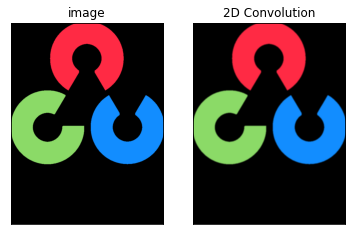

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img= cv2.imread('opencv-logo.png')
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel= np.ones((5,5), np.float32)/25
dst= cv2.filter2D(img, -1, kernel)
#blur= cv2.blur(img, (5,5));

titles= ['image','2D Convolution']
images= [img,dst]

for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()



# Image Pyramid

In [4]:
# in image pyramid the image goes to multiple smoothining

#two types:  gaussian pyramid and laplacian pyramid

import cv2
import numpy as np
img = cv2.imread("lena.jpg")

layer = img.copy()
gp = [layer]

for i in range(6):
    layer = cv2.pyrDown(layer)
    gp.append(layer)
    #cv2.imshow(str(i), layer)

layer = gp[5]
cv2.imshow('upper level Gaussian Pyramid', layer)
lp = [layer]

for i in range(5, 0, -1):
    gaussian_extended = cv2.pyrUp(gp[i])
    laplacian = cv2.subtract(gp[i-1], gaussian_extended)
    cv2.imshow(str(i), laplacian)
    
# a level in Laplacian pyramid is formed by the difference between the level in Gaussian pyramid and expanded version f its upper level in g pyramid
    
#lr1= cv2.pyrDown(img)

#hr=  cv2.pyrUp(img)


cv2.imshow("Original image", img)
#cv2.imshow("pyrdown 1 image", lr1)
#cv2.imshow("pyrup 1 image", hr)



cv2.waitKey(0)
cv2.destroyAllWindows()

# Image gradient and edge detection

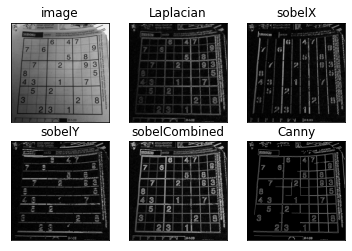

In [19]:
# several image gradient methods
# METHODS: laplacian gradient method, sobel1, sobel2

import cv2
import numpy as np
from matplotlib import pyplot as plt

img= cv2.imread("sudoku.png", cv2.IMREAD_GRAYSCALE)

lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0) #X derivative # change in vertical direction
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1) #Y Derivative # change in horizontal direction
edges= cv2.Canny(img,100,200)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))
edges= cv2.Canny(img,100,200)
sobelCombined = cv2.bitwise_or(sobelX, sobelY)


titles = ['image', 'Laplacian', 'sobelX', 'sobelY', 'sobelCombined','Canny']
images = [img,lap, sobelX, sobelY, sobelCombined, edges]
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()



# Canny edge detction

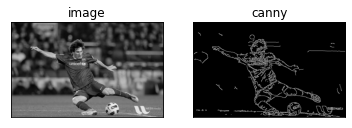

In [17]:
# canny edge detector uses multi stage algorithm to detect a wide range of edge in images
# 5 STEPS: 
#1. noise reduction
#2. gradient calculation
#3. non max suupression
#4. double threshold
#5. edge tracking by hysteris

#canny gives image with less noise 


import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("messi5.jpg",0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
canny = cv2.Canny(img, 100, 200)

titles = ['image', 'canny']
images = [img, canny]
for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()



# Finding and drwing contours

In [28]:
import numpy as np
import cv2

img = cv2.imread('opencv-logo.png')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
print("Number of contours = " + str(len(contours)))
print(contours[0])

# contours s a python list of all the contours in the image. each individual contour is a numpy array of (x,y) coordinate
# heirchary cotains info about image topology
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
cv2.drawContours(imgray, contours, -1, (0, 255, 0), 3)

cv2.imshow('Image', img)
cv2.imshow('Image GRAY', imgray)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of contours = 19
[[[479 466]]]


# Detect shapes

In [1]:
import numpy as np
import cv2

img = cv2.imread('shape.jpg')
imgGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thrash = cv2.threshold(imgGrey, 240, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thrash, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01* cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [approx], 0, (0, 0, 0), 5)
    x = approx.ravel()[0]
    y = approx.ravel()[1] - 5
    
    
    if len(approx) == 3:
        cv2.putText(img, "Triangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
    elif len(approx) == 4:
        x1 ,y1, w, h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        print(aspectRatio)
        
        if aspectRatio >= 0.95 and aspectRatio <= 1.05:
            cv2.putText(img, "square", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
        else:
            cv2.putText(img, "rectangle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
            
    elif len(approx) == 5:
        cv2.putText(img, "Pentagon", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
        
    elif len(approx) == 10:
        cv2.putText(img, "Star", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))
        
    else:
        cv2.putText(img, "Circle", (x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 0))


cv2.imshow("shape", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

1.0
1.0140845070422535
1.847457627118644


# Detect corners with shi tomasi corner detector method

In [37]:
import numpy as np
import cv2 as cv

img = cv.imread('pic1.png')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray, 100, 0.01, 10) #(no of corners to be detected, minimal expected quality, min distance)

corners = np.int0(corners)

for i in corners:
    x, y = i.ravel() #find value of x and y
    cv.circle(img, (x, y), 3, [255, 255, 0], -1)

cv.imshow('Shi-Tomasi Corner Detector', img)

if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

# Harris corner Detector

In [40]:
import numpy as np
import cv2 as cv

#steps
#1. determine which windows produce very large variations in intensity when moved in both x and y direction
#2. we find value of R 
#3. AFTER APPLYING THRESHOLD TO THIS SCORE IMP CORNERS ARE SELECTED AND MARKED

img = cv.imread('chessboard.png')

cv.imshow('img', img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)

dst = cv.dilate(dst, None)

img[dst > 0.01 * dst.max()] = [0, 0, 255]#COORDINATES OF RED COLOR

cv.imshow('dst', img)

if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

# Morphological Transformations

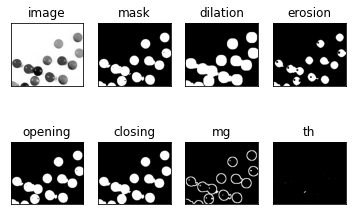

In [44]:
# it is simple operations based on the image shape
# performed on binary image

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('smarties.png', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)


kernal = np.ones((5,5), np.uint8) #a kernel is norally a square which we want to apply on our image

dilation = cv2.dilate(mask, kernal, iterations=2) #cancel out all the black dots from masked image
erosion = cv2.erode(mask, kernal, iterations=2) # it erodes away the boundary 
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernal) # erosin performed then dilation on image
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernal) # first dilation then erosin perform on image

mg = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernal) # difference between dilation and erosin of image
th = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernal) # difference between image and opening of image

titles = ['image', 'mask', 'dilation', 'erosion', 'opening', 'closing', 'mg', 'th']
images = [img, mask, dilation, erosion, opening, closing, mg, th]

for i in range(8):
    plt.subplot(2, 4, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# Hough Transform

In [47]:
# popular technique to detect any shape and can identigy even when shape is broken or disorted a little.

# line equation: y= mx+c

# PROBALISTIC HOUGH TRANSFORM 

import cv2
import numpy as np
img = cv2.imread('sudoku.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray,50,150,apertureSize = 3)
cv2.imshow('edges', edges)
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)
# ( rho,theta,threshold, minilinelength, maxlinegap): arguments 

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imshow('image', img)
k = cv2.waitKey(0)
cv2.destroyAllWindows()


CRCLE DETECTION USING HOUGH CIRCLE TRANSFORM

In [2]:
import numpy as np
import cv2 as cv
img = cv.imread('shape.jpg')
output = img.copy()

# DETECT COORDINATES OF CRCLE AND RADIUS OF CIRCLE

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray, 5)

circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 20,
                          param1=50, param2=30, minRadius=0, maxRadius=0)
detected_circles = np.uint16(np.around(circles))

for (x, y ,r) in detected_circles[0, :]:
    cv.circle(output, (x, y), r, (0, 0, 0), 3)
    cv.circle(output, (x, y), 2, (0, 255, 255), 3)

cv.imshow('output',output)
cv.waitKey(0)
cv.destroyAllWindows()

# Face detection

In [5]:
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')# cascade classifier is a method name
# Read the input image
#img = cv2.imread('test.png')
cap = cv2.VideoCapture(0)

while cap.isOpened(): #while video is on
    _, img = cap.read() #reading frame which comes in video and detect faces

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #gray scale image
    faces = face_cascade.detectMultiScale(gray, 1.1, 4) #result from face_cascade classifier
    # arguments (image, scale factor-specifies how much image size is reduces, min neighbours) 

    for (x, y , w ,h) in faces:# detected face
        # iteration widhth and height of retangle
        cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0 , 0), 3)
        # parameters( image, (x,y coordinate), color, thickhness)

    # Display the output
    cv2.imshow('img', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Eye detection

In [4]:
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')# cascade classifier for eye
cap = cv2.VideoCapture(0)

while cap.isOpened():
    _, img = cap.read()
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y , w ,h) in faces:
        
        cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0 , 0), 3)
        
        roi_gray = gray[y:y+h, x:x+w] #original grey scale region of interest
        roi_color = img[y:y+h, x:x+w] # will give grey which is original image
        
        eyes = eye_cascade.detectMultiScale(roi_gray) #use method detectmultiscal
        for (ex, ey ,ew, eh) in eyes: # to iterate over eyes x,y vooridinate and widht and height
            cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0, 255, 0), 5)
            # (coloured original image, x,y coordinate, x coordinate + widht and y coordinate +height, color parameter, widht)

    # Display the output
    cv2.imshow('img', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Road Line detection

In [22]:
# aim: detect lanes 
# lanes are parallel and seems to merge at one point


import matplotlib.pylab as plt
import cv2
import numpy as np

def region_of_interest(img, vertices):# region of interest - the lane only
    mask = np.zeros_like(img) # will define a image matrix
    #channel_count = img.shape[2] # retrieve no of color channel from image
    match_mask_color = 255 # will create match color with the same color count as before
    cv2.fillPoly(mask, vertices, match_mask_color) # will take the region of interest that is lane
    masked_image = cv2.bitwise_and(img, mask) # return image where the mask pixel matcehs
    return masked_image

def drow_the_lines(img, lines): # method
    img = np.copy(img) # original image ki copy
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    #create blank image which matches original image size 
    #(shape image, height and width at 0 and 1 index respectively, datatype)
    
    for line in lines: # loop around line vector
        for x1, y1, x2, y2 in line: #(coordiates)
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)
          # draw LINE 
    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0) # MERGE
    # function use to merge two images (img, weight to provide=alpha, second image, beta, game)
    return img


#image = cv2.imread('road.png')
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converted image , overwrite the original image

def process(image):
    
    print(image.shape) # to identify the shape of image
    height = image.shape[0]
    width = image.shape[1]
    
    region_of_interest_vertices = [
        (0, height), # one corner
        (width/2, height/2), # at end
        (width, height) # last corner
    ]
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) #convert image into gray scale image
    canny_image = cv2.Canny(gray_image, 100, 120) # apply canny edge detecion


    cropped_image = region_of_interest(canny_image,
                                       np.array([region_of_interest_vertices], np.int32),)
# define a variable =  np.array(np.int32)

    lines = cv2.HoughLinesP(cropped_image,
                             rho=2,
                             theta=np.pi/180,
                             threshold=50,
                             lines=np.array([]),
                             minLineLength=40,
                             maxLineGap=100)
# HOUGH LINE TRANSFORM METHOD
# ARGUMENTS( image, value of rho, theta, threshold,lines, minlinelength, maxlinegap)


    image_with_lines = drow_the_lines(image, lines)
    return image_with_lines

cap = cv2.VideoCapture('lane.mp4')

while cap.isOpened(): # return boolean value
    
    ret, frame = cap.read() #will read all frames
    frame = process(frame) #apply process function and pass frame variable
    cv2.imshow('frame', frame) # show result
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)
(720, 1280

# Motion Detection and Tracking

In [2]:
import cv2
import numpy as np

cap = cv2.VideoCapture('vtest.avi')

frame_width = int( cap.get(cv2.CAP_PROP_FRAME_WIDTH))

frame_height =int( cap.get( cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc('X','V','I','D')

out = cv2.VideoWriter("output.avi", fourcc, 5.0, (1280,720))

ret, frame1 = cap.read() #declaring frme 1
ret, frame2 = cap.read() # declaring frame 2
print(frame1.shape)

while cap.isOpened():
    
    diff = cv2.absdiff(frame1, frame2) # this is to find absolute difference between frame 1 and frame 2
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY) # convert into gray scale, contours are easily found in gray scale
    blur = cv2.GaussianBlur(gray, (5,5), 0) # we will blur grey scale frame and apply gaussian blur (kernel size, sigma x value)
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY) # (source image,threshold value, max threshold value, type)
    dilated = cv2.dilate(thresh, None, iterations=3) # help to find better contours so we dilute the frame
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #find contours on the dilated image

    for contour in contours: #iterating over countours
        (x, y, w, h) = cv2.boundingRect(contour) # method boundingRect which gives us x,y coordinate and width and height

        if cv2.contourArea(contour) < 900: # if area of contour is greater then 900 then continue otherwise do nothing
            continue
        cv2.rectangle(frame1, (x, y), (x+w, y+h), (0, 255, 0), 2) # drawing rectangle frames aroundd the moving objects
        
        cv2.putText(frame1, "Status: {}".format('Movement'), (10, 20), cv2.FONT_HERSHEY_SIMPLEX,
                    1, (0, 0, 255), 3) # putting text over the frames
    #cv2.drawContours(frame1, contours, -1, (0, 255, 0), 2) 

    #image = cv2.resize(frame1, (1280,720))
    #out.write(image)
    cv2.imshow("feed", frame1)
    frame1 = frame2
    ret, frame2 = cap.read() #reading new frame -frame 2

    if cv2.waitKey(40) == 27:
        break

cv2.destroyAllWindows()
cap.release()
out.release()

(576, 768, 3)


# Mean Shift Object tracking



In [3]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture('slow_traffic_small.mp4')

# take first frame of the video
ret, frame = cap.read()

# setup initial location of window
x, y, width, height = 300, 200, 100, 50
track_window = (x, y ,width, height)

# set up the ROI for tracking 
roi = frame[y:y+height, x : x+width] # region of interest
# frame[initial position of the window we want to achieve]

hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)# convert into hsv color space

mask = cv.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180., 255., 255)))
#(hsv_roi, lower limit, upper limit) parameters

roi_hist = cv.calcHist([hsv_roi], [0], mask, [180], [0, 180]) # calculating histogram value 

cv.normalize(roi_hist, roi_hist, 0, 255,cv.NORM_MINMAX) #normalize these values

# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1)

cv.imshow('roi',roi)
while(1):
    ret, frame = cap.read()
    if ret == True:

        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1) #function for calculating back projection
       
     # apply meanshift to get the new location
        ret, track_window = cv.meanShift(dst, track_window, term_crit)
      
    # Draw it on image
        x,y,w,h = track_window
        final_image = cv.rectangle(frame, (x,y), (x+w, y+h), 255, 3)

        cv.imshow('dst', dst)
        cv.imshow('final_image',final_image)
        k = cv.waitKey(30) & 0xff
        if k == 27:
            break
    else:
        break
cv.destroyAllWindows()

# camshift algo

In [6]:
# continuously adpted 
import numpy as np
import cv2 as cv

cap = cv.VideoCapture('slow_traffic_small.mp4')
# take first frame of the video

ret, frame = cap.read()
# setup initial location of window
x, y, width, height = 300, 200, 100, 50
track_window = (x, y ,width, height)

# set up the ROI for tracking
roi = frame[y:y+height, x : x+width]
hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)
mask = cv.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180., 255., 255)))
roi_hist = cv.calcHist([hsv_roi], [0], mask, [180], [0, 180])
cv.normalize(roi_hist, roi_hist, 0, 255,cv.NORM_MINMAX)
# Setup the termination criteria, either 10 iteration or move by atleast 1 pt
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1)
cv.imshow('roi',roi)

while(1):
    ret, frame = cap.read()
    if ret == True:

        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        
        # apply meanshift to get the new location
        ret, track_window = cv.CamShift(dst, track_window, term_crit)

        # Draw it on image
        pts = cv.boxPoints(ret) #function boxPoints and takes few arguments 
        print(pts)
        pts = np.int0(pts) #pts convert points into integer value
        final_image = cv.polylines(frame, [pts], True, (0, 255, 0), 2) #rotating rectangle so using this method
            
        #x,y,w,h = track_window
        #final_image = cv.rectangle(frame, (x,y), (x+w, y+h), 255, 3)

        cv.imshow('dst', dst)
        cv.imshow('final_image',final_image)
        k = cv.waitKey(30) & 0xff
        if k == 27:
            break
    else:
        break
        
cv.destroyAllWindows()

[[339.31424 195.7324 ]
 [380.0798  200.41194]
 [377.68576 221.2676 ]
 [336.9202  216.58806]]
[[339.45575 198.6894 ]
 [377.55865 201.2571 ]
 [376.54425 216.3106 ]
 [338.44135 213.7429 ]]
[[339.4982  198.5943 ]
 [377.45255 201.12036]
 [376.5018  215.4057 ]
 [338.54745 212.87964]]
[[341.48303 198.58981]
 [377.5428  201.19125]
 [376.51697 215.41019]
 [340.4572  212.80875]]
[[341.62668 198.51187]
 [376.58133 201.53894]
 [375.37332 215.48813]
 [340.41867 212.46106]]
[[342.17767 201.27888]
 [376.28906 202.59138]
 [375.82233 214.72112]
 [341.71094 213.40862]]
[[341.994   201.44073]
 [376.37552 202.49374]
 [376.006   214.55927]
 [341.62448 213.50626]]
[[344.0154  203.81923]
 [377.14804 204.37135]
 [376.9846  214.18077]
 [343.85196 213.62865]]
[[344.0528  203.83357]
 [377.1178  204.41173]
 [376.9472  214.16643]
 [343.8822  213.58827]]
[[346.10773 203.87318]
 [378.07886 204.49232]
 [377.89227 214.12682]
 [345.92114 213.50768]]
[[348.1475  203.86557]
 [380.0596  204.55545]
 [379.8525  214.13443]
 